# C964 Capstone Project

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import keras
#from keras.layers import LSTM
import watermark

%matplotlib inline

Training and testing data

In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [8]:
###gets the total number of slaes for all stores and items for each day of the training data
sales_daily = train_data.groupby('date', as_index=False)['sales'].sum

### gets total sales by store for each day of training data
sales_daily_store = train_data.groupby(['store', 'date'], as_index=False)['sales'].sum()

### gets total sales of each item for each day of traing set
sales_daily_item = train_data.groupby(['item', 'date'], as_index=False)['sales'].sum()


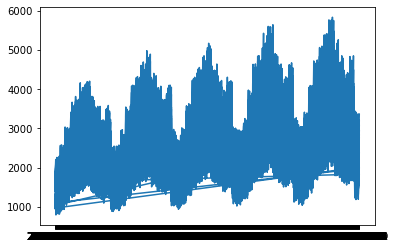

In [21]:
fig, ax = plt.subplots()
ax.plot(sales_daily_store['date'],sales_daily_store['sales']);

In [3]:
def lstm_model(train_data, test_data):
    """Runs a long-short-term-memory nueral net with 2 dense layers. Generates
    predictions that are then unscaled. Scores are printed and results are
    plotted and saved.
    Keyword arguments:
    -- train_set: dataset used to train the model
    -- test_set: dataset used to test the model
    """

    # Split into X & y and scale data
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)

    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    # Build LSTM
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False)
    predictions = model.predict(X_test, batch_size=1)

    # Undo scaling to compare predictions against original data
    original_df = load_data('../data/monthly_data.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)

    # print scores and plot results
    get_scores(unscaled_df, original_df, 'LSTM')
    plot_results(unscaled_df, original_df, 'LSTM')

In [4]:
%load_ext watermark

%watermark -v -m -p pandas,numpy,watermark,keras,sklearn,matplotlib

print(" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

pandas    : 1.3.4
numpy     : 1.21.2
watermark : 2.3.0
keras     : 2.6.0
sklearn   : 1.0.1
matplotlib: 3.5.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD
CPU cores   : 32
Architecture: 64bit

 
Last updated: Thu May 19 2022 16:18:08Central Daylight Time

